# Learning Rate Evaluation

In this project we will evaluate the importance of a good learning rate value when training our model.

The next formula is the equation by which the Neural Network upgrades its parameters' values (the weights and the bias, represented by a Theta). The learning rate is the slope, and it is represented by an Alpha.
    By this method, the value of the loss function will (hopefully) decrease everytime we upgrade the parameters. However, if we choose a bad learning rate, the loss function value could increase.

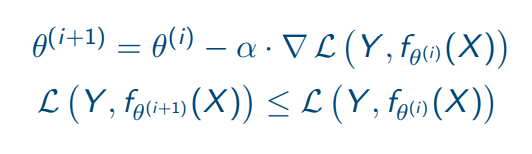

**Libraries**

Let's start by importing all the libraries we will need:

In [39]:
%matplotlib inline
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt

**Functions**

We define the functions we will use repeatedly through this project.

First of all, we create our Convolutional Neural Network by passing as a parameter the learning rate value.

In [40]:
def eval_hyperparam(learning_rate): 
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    sgd = optimizers.SGD(lr=learning_rate) #using SGD as an optimizer
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=0)
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("Baseline Error: %.2f%%" % (100-scores[1]*100))
    return history

The following functions will display in a graph the accuracy and the cross (categorical loss entropy) evolution throughout the training and the validation process.

In [41]:
def plot_accuracy(history):
    plt.plot(history.history['acc'], label='training accuracy')
    plt.plot(history.history['val_acc'], label='validation accuracy')
    plt.legend()
    plt.title("Accuracy")
    plt.show()

In [42]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='training loss')
    plt.plot(history.history['val_loss'], label='validation loss')
    plt.title('Loss (categorical cross entropy)')
    plt.legend()
    plt.show()

**Data reshaping**

We transform the data from MNIST dataset in order to make it readable for the CNN.

In [43]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255.
X_test = X_test / 255.

In [44]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

**Comparison of different learning rate values**

**Case 1**: learning rate = 0.01

Baseline Error: 4.66%


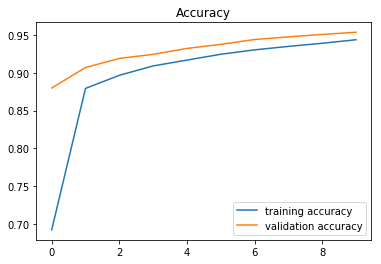

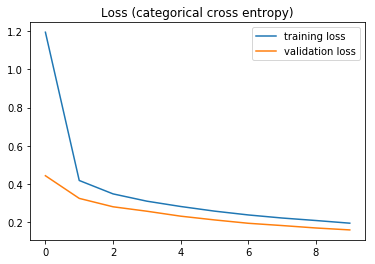

In [45]:
history = eval_hyperparam(0.01)
plot_accuracy(history)
plot_loss(history)

We see that, surprisingly, the validation accuracy is higher than the training one (and the loss is lower). Even though, we have an error of 4.66%.

**Case 2**: learning rate = 0.1

Baseline Error: 1.26%


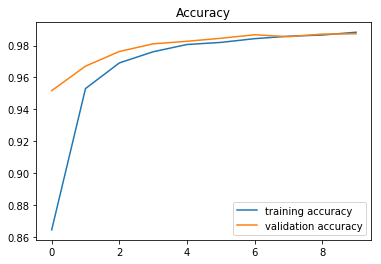

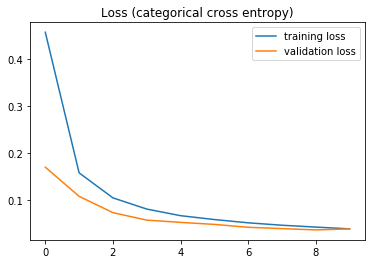

In [49]:
history = eval_hyperparam(0.1)
plot_accuracy(history)
plot_loss(history)

We see that the accuracy has improved and the loss has dropped. It has just an error of 1.26%. In addition, we notice that the validation and the training error are converging.

**Case 3**: learning rate = 0.5

Baseline Error: 1.04%


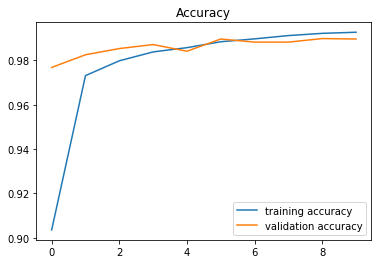

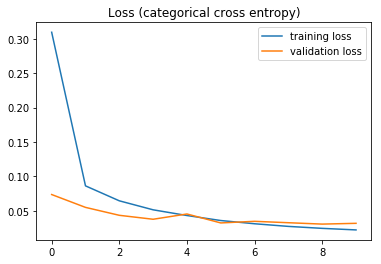

In [48]:
history = eval_hyperparam(0.5)
plot_accuracy(history)
plot_loss(history)

This time the accuracy and the loss have improved, so we can assume we are near of a minimum in the loss function. But we can see that the validation error is higher than the training one.

**Case 4**: learning rate = 1

Baseline Error: 88.65%


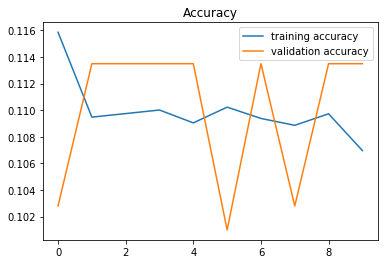

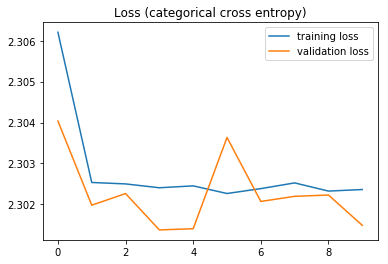

In [50]:
history = eval_hyperparam(1)
plot_accuracy(history)
plot_loss(history)

We have an error of 88.65%! The value was so high it was rather useless for upgrading the parameters.

**Conclusion**

The best learning rate value should be around 0.5.

Observation: In other tests, the best training value resulted to be somewhere between 0.1 and 0.5, so we have deduced that the random samples with which the CNN is trained influence considerably the loss function evolution.

**Alternatives**

*Cyclical Learning Rate*

This method consists in cycling the learning rate value between a lower bound and an upper bound. The higher values are useful when the function reaches a saddle point, because it is easier to come out of it than with a lower value.

*Warmup*

Warmup consists in inreasing the learning rate value while training. There are two types:

   - Constant warmup: For a few epochs, you train the model with a small learning rate and then increase the learning rate by multiplying by a certain constant number.

   - Gradual warmup: You start with a small learning rate and then gradually increase it until it reaches a desired value. It is useful with large batch sizes.

Jennifer Cheung and Paula Barja, January 2018